# 1.Introduction

This notebook contains the development of my final work for bachelor's degree in Computer Engineering at Federal University of Rio Grande do Norte. It contains a exploratory data analysis of the database of residents of the state of Rio Grande do Norte that attended to ENEM, the High School National Exam, a national exam that allows students to enter public and federal universities, and also evaluates the performance of the high school around the country.

In this notebook, we will study the performance of the students in Rio Grande do Norte, a state of the Northeast in Brazil. We will take a look at various featuras and indicators to make local managers of education have a visual tool to ease the decision making of the next steps of the state's education.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
_ = sns.set_style("darkgrid")

educ = pd.read_csv('./data/enem_rn_2017.csv', sep=';', encoding='ISO-8859-1')
print(educ.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159076 entries, 0 to 159075
Columns: 139 entries, Unnamed: 0 to Q027
dtypes: float64(31), int64(65), object(43)
memory usage: 168.7+ MB
None


# 2. Raw analysis of the grades
In this section, we're gonna analyse the distribution of grades in each subject, and also visualize how social and economic factors, like the type of school in which the student spent his high school, have influence in the data's spread and other statistical attributes, such as mean, median, etc...

In [2]:
grade_cols = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

grades = educ[grade_cols].dropna()

print(grades.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109400 entries, 0 to 159075
Data columns (total 5 columns):
NU_NOTA_CN         109400 non-null float64
NU_NOTA_CH         109400 non-null float64
NU_NOTA_LC         109400 non-null float64
NU_NOTA_MT         109400 non-null float64
NU_NOTA_REDACAO    109400 non-null float64
dtypes: float64(5)
memory usage: 5.0 MB
None


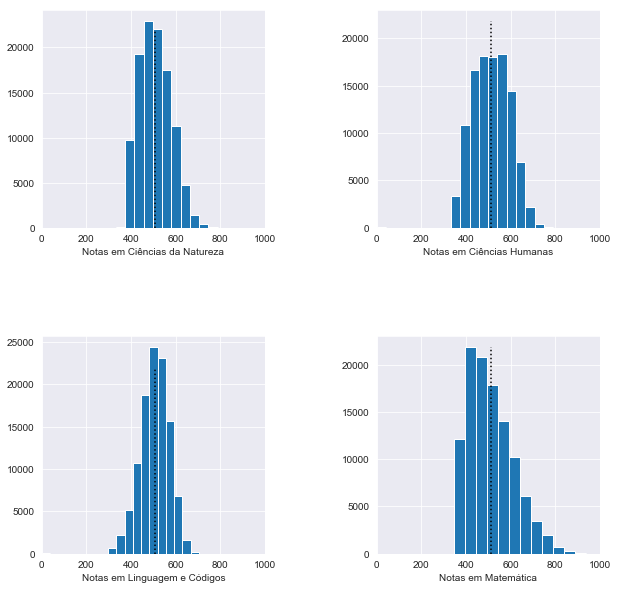

In [3]:
#Plotando os gráficos das distribuições de média
bins = 20

plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.hist(grades['NU_NOTA_CN'], bins=bins)
plt.xlabel('Notas em Ciências da Natureza')
plt.xlim(0, 1000)
plt.vlines(x=grades['NU_NOTA_CN'].mean(),
          ymin=0, ymax=grades['NU_NOTA_CN'].count()/5,
          linestyles='dotted')

plt.subplot(2, 2, 2)
plt.hist(grades['NU_NOTA_CH'], bins=bins)
plt.xlabel('Notas em Ciências Humanas')
plt.xlim(0, 1000)
plt.vlines(x=grades['NU_NOTA_CH'].mean(),
          ymin=0, ymax=grades['NU_NOTA_CH'].count()/5,
          linestyles='dotted')

plt.subplot(2, 2, 3)
plt.hist(grades['NU_NOTA_LC'], bins=bins)
plt.xlabel('Notas em Linguagem e Códigos')
plt.xlim(0, 1000)
plt.vlines(x=grades['NU_NOTA_LC'].mean(),
          ymin=0, ymax=grades['NU_NOTA_LC'].count()/5,
          linestyles='dotted')

plt.subplot(2, 2, 4)
plt.hist(grades['NU_NOTA_MT'], bins=bins)
plt.xlabel('Notas em Matemática')
plt.xlim(0, 1000)
plt.vlines(x=grades['NU_NOTA_MT'].mean(),
          ymin=0, ymax=grades['NU_NOTA_MT'].count()/5,
          linestyles='dotted')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

C:\Users\Cliente\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


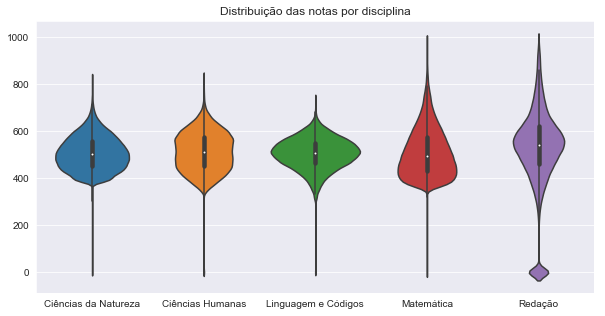

In [4]:
#Fazendo ViolinPlot das notas por escola
labels_subjects = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagem e Códigos', 'Matemática', 'Redação']

plt.figure(figsize=(10, 5))
sns.violinplot(data=grades)
plt.xticks(np.arange(5), labels_subjects)
plt.title('Distribuição das notas por disciplina')
plt.show()

In [5]:
#Separando notas baseados no tipo de escola que a pessoa estudou
grade_type_cols = grade_cols + ['TP_ESCOLA']
grades_type_school = educ[grade_type_cols]

tipo1 = grades_type_school[grades_type_school['TP_ESCOLA'] == 1].drop('TP_ESCOLA', axis=1)
tipo2 = grades_type_school[grades_type_school['TP_ESCOLA'] == 2].drop('TP_ESCOLA', axis=1)
tipo3 = grades_type_school[grades_type_school['TP_ESCOLA'] == 3].drop('TP_ESCOLA', axis=1)
tipo4 = grades_type_school[grades_type_school['TP_ESCOLA'] == 4].drop('TP_ESCOLA', axis=1)

In [6]:
#descrições estatísticas dos candidatos baseados no tipo de escola em que estudaram no ensino médio
print('Candidatos que não responderam o tipo de escola:')
print(tipo1.describe(), '\n')

print('Candidatos que fizeram ensino médio em escolas públicas:')
print(tipo2.describe(), '\n')

print('Candidatos que fizeram ensino médio em escolas particulares:')
print(tipo3.describe(), '\n')

print('Candidatos que fizeram ensino médio no exterior:')
print(tipo4.describe())

Candidatos que não responderam o tipo de escola:
         NU_NOTA_CN    NU_NOTA_CH    NU_NOTA_LC    NU_NOTA_MT  NU_NOTA_REDACAO
count  86164.000000  90916.000000  90916.000000  86164.000000     90916.000000
mean     507.184085    511.287785    505.051665    509.434936       510.955167
std       69.803979     83.275423     65.885982    101.009188       180.673955
min        0.000000      0.000000      0.000000      0.000000         0.000000
25%      453.200000    448.500000    464.100000    429.200000       440.000000
50%      502.700000    511.200000    508.700000    492.700000       540.000000
75%      556.100000    573.300000    550.500000    573.700000       600.000000
max      795.900000    823.200000    741.400000    987.000000       980.000000 

Candidatos que fizeram ensino médio em escolas públicas:
         NU_NOTA_CN    NU_NOTA_CH    NU_NOTA_LC    NU_NOTA_MT  NU_NOTA_REDACAO
count  18236.000000  19087.000000  19087.000000  18236.000000     19087.000000
mean     493.362492    

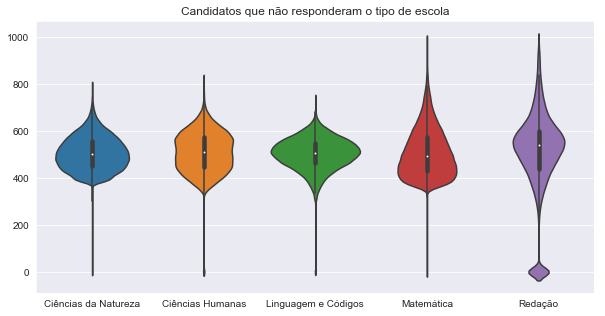

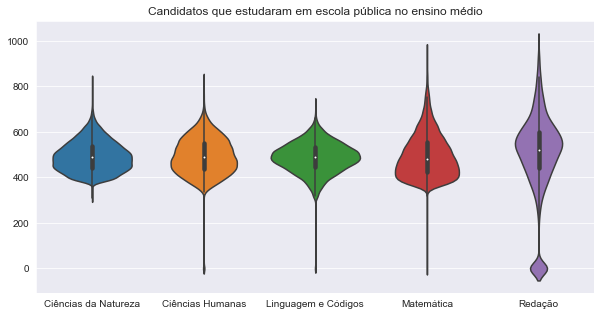

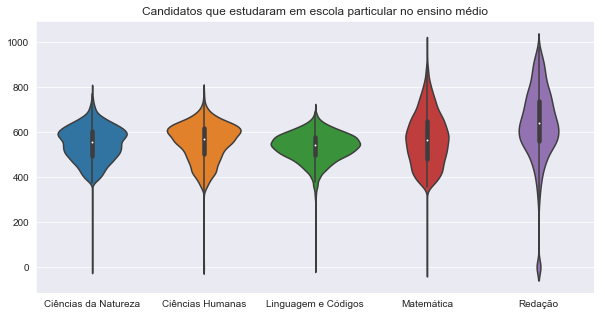

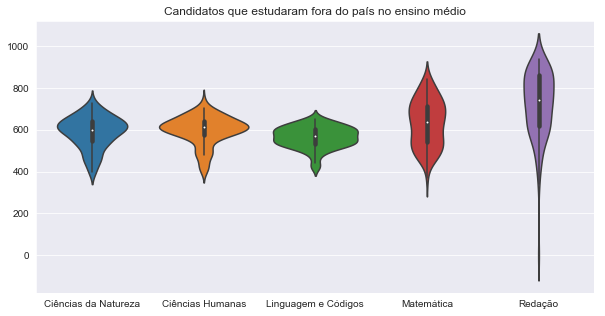

In [7]:
#ViolinPlot por tipo de escola que a pessoa estudou
size_plots = 0.5

plt.figure(figsize=(10, 5))
sns.violinplot(data=tipo1)
plt.xticks(np.arange(5), labels_subjects)
plt.title('Candidatos que não responderam o tipo de escola')


plt.figure(figsize=(10, 5))
sns.violinplot(data=tipo2)
plt.xticks(np.arange(5), labels_subjects)
plt.title('Candidatos que estudaram em escola pública no ensino médio')

plt.figure(figsize=(10, 5))
sns.violinplot(data=tipo3)
plt.xticks(np.arange(5), labels_subjects)
plt.title('Candidatos que estudaram em escola particular no ensino médio')

plt.figure(figsize=(10, 5))
sns.violinplot(data=tipo4)
plt.xticks(np.arange(5), labels_subjects)
plt.title('Candidatos que estudaram fora do país no ensino médio')

plt.subplots_adjust(
    hspace=0.5, wspace=0.5)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159076 entries, 0 to 159075
Columns: 139 entries, Unnamed: 0 to Q027
dtypes: float64(31), int64(65), object(43)
memory usage: 168.7+ MB
None
F    91071
M    68005
Name: TP_SEXO, dtype: int64


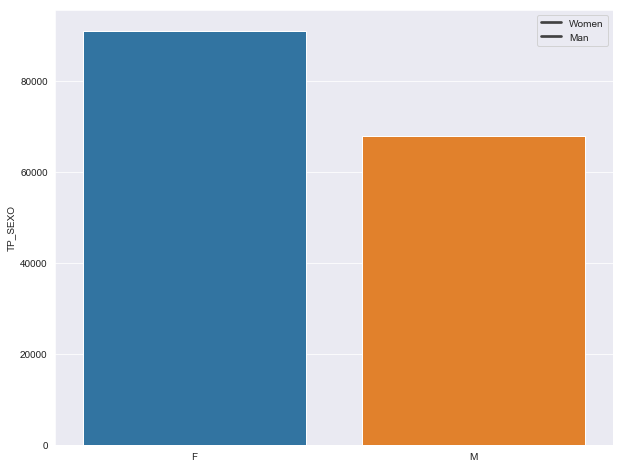

In [8]:
#Separando as notas de acordo com o sexo do candidato da prova
grades_sex_cols = grade_cols + ['TP_SEXO']
grades_sex = educ[grades_sex_cols]
print(educ.info())
grades_male = grades_sex[grades_sex['TP_SEXO'] == "M"].drop('TP_SEXO', axis=1)
grades_female = grades_sex[grades_sex['TP_SEXO'] == "F"].drop('TP_SEXO', axis=1)

sex_count = educ['TP_SEXO'].value_counts()
print(sex_count)
labels = ['Women', 'Man']
plt.figure(figsize=(10, 8))
sns.barplot(x=sex_count.index, y=sex_count)
plt.legend(labels)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159076 entries, 0 to 159075
Columns: 139 entries, Unnamed: 0 to Q027
dtypes: float64(31), int64(65), object(43)
memory usage: 168.7+ MB
None
Dados estatísticos dos homens:
         NU_NOTA_CN    NU_NOTA_CH    NU_NOTA_LC    NU_NOTA_MT  NU_NOTA_REDACAO
count  47237.000000  49660.000000  49660.000000  47237.000000     49660.000000
mean     519.071783    524.936839    507.359644    536.071844       509.194120
std       71.953521     85.959306     68.336458    109.471025       180.564914
min        0.000000      0.000000      0.000000      0.000000         0.000000
25%      464.200000    461.100000    465.100000    447.800000       440.000000
50%      517.100000    530.700000    512.200000    524.100000       540.000000
75%      571.000000    589.200000    554.900000    610.300000       600.000000
max      828.700000    832.500000    741.400000    987.000000       980.000000 

Dados estatísticos das mulheres:
         NU_NOTA_CN    NU_NOTA_C

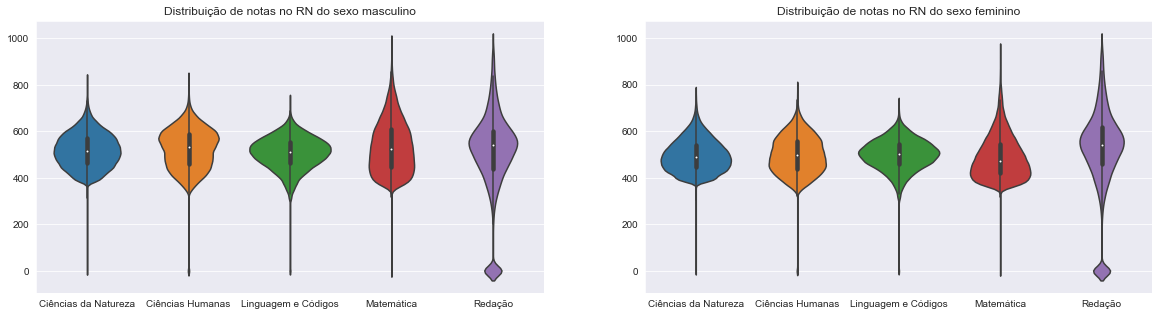

In [9]:
#Plotando violin plots por sexo e imprimindo atributos estatísticos das distribuições
print(educ.info())
print('Dados estatísticos dos homens:')
print(grades_male.describe(), '\n')

print('Dados estatísticos das mulheres:')
print(grades_female.describe())



plt.figure(figsize=(20, 5))

plt.subplot(121)
sns.violinplot(data=grades_male)
plt.xticks(np.arange(5), labels_subjects)
plt.title('Distribuição de notas no RN do sexo masculino')

plt.subplot(122)
sns.violinplot(data=grades_female)
plt.xticks(np.arange(5), labels_subjects)
plt.title('Distribuição de notas no RN do sexo feminino')

plt.show()

<class 'pandas.core.series.Series'>


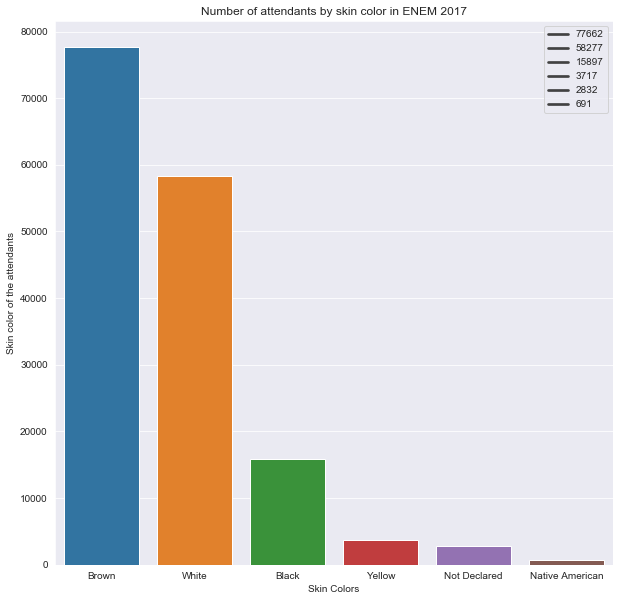

In [10]:
#Analisando dados de acordo com a cor de pele do candidato
grade_race_cols = grade_cols + ['TP_COR_RACA']
grade_race = educ[grade_race_cols]

not_declared = grade_race[grade_race['TP_COR_RACA'] == 0].drop('TP_COR_RACA', axis=1)
white = grade_race[grade_race['TP_COR_RACA'] == 1].drop('TP_COR_RACA', axis=1)
black = grade_race[grade_race['TP_COR_RACA'] == 2].drop('TP_COR_RACA', axis=1)
brown = grade_race[grade_race['TP_COR_RACA'] == 3].drop('TP_COR_RACA', axis=1)
yellow = grade_race[grade_race['TP_COR_RACA'] == 4].drop('TP_COR_RACA', axis=1)
native_american = grade_race[grade_race['TP_COR_RACA'] == 5].drop('TP_COR_RACA', axis=1)

labels = {0: 'Not Declared', 1: 'White',
          2: 'Black', 3: 'Brown',
          4: 'Yellow', 5: 'Native American'}
race_count = grade_race['TP_COR_RACA'].value_counts().rename(index=labels)
print(type(race_count))
plt.figure(figsize=(10, 10))
sns.barplot(x=race_count.index, y=race_count)
plt.legend(labels=race_count, loc="upper right")
plt.ylabel("Skin color of the attendants")
plt.xlabel("Skin Colors")
plt.title("Number of attendants by skin color in ENEM 2017")
plt.show()

In [11]:
#Analizando os atributos estatísticos para os diferentes candidatos
print('Dados estatísticos para os que não declararam sua cor:')
print(not_declared.describe(), '\n')

print('Dados estatísticos para os que se declararam brancos:')
print(white.describe(), '\n')

print('Dados estatísticos para os que se declararam negros: ')
print(black.describe(), '\n')

print('Dados estatísticos para os que se declararam pardos: ')
print(brown.describe(), '\n')

print('Dados estatísticos para os que se declararam amarelos: ')
print(yellow.describe(), '\n')

print('Dados estatísticos para os que se declararam indígenas: ')
print(native_american.describe())

Dados estatísticos para os que não declararam sua cor:
        NU_NOTA_CN   NU_NOTA_CH   NU_NOTA_LC   NU_NOTA_MT  NU_NOTA_REDACAO
count  1911.000000  2005.000000  2005.000000  1911.000000      2005.000000
mean    523.819623   529.420449   517.573466   528.048927       517.526185
std      78.462203    92.799769    74.132234   115.697241       198.054069
min     367.800000     0.000000     0.000000   350.600000         0.000000
25%     462.200000   456.700000   468.400000   435.950000       440.000000
50%     517.800000   530.100000   523.900000   507.900000       540.000000
75%     581.350000   601.600000   572.500000   599.250000       620.000000
max     795.900000   772.800000   711.300000   942.800000       960.000000 

Dados estatísticos para os que se declararam brancos:
         NU_NOTA_CN    NU_NOTA_CH    NU_NOTA_LC    NU_NOTA_MT  NU_NOTA_REDACAO
count  40815.000000  42799.000000  42799.000000  40815.000000     42799.000000
mean     515.170790    520.524400    511.241772    522.7

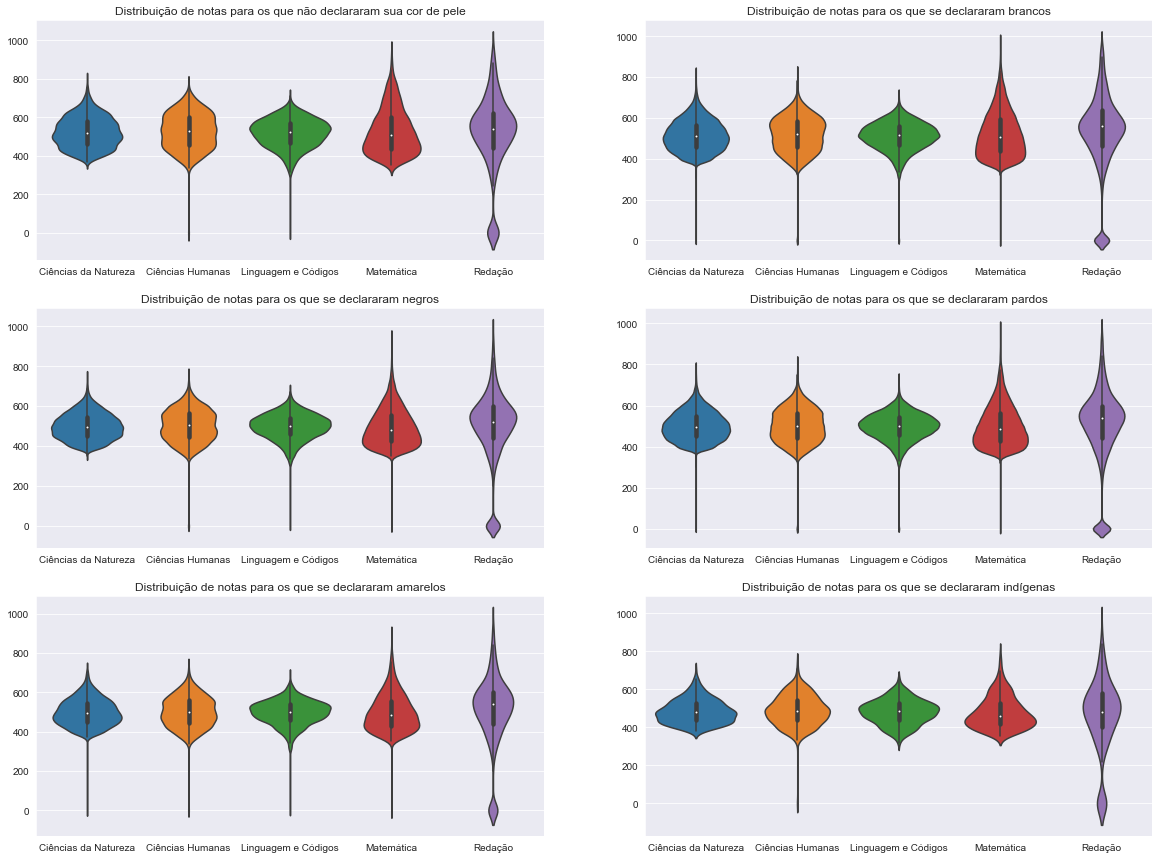

In [12]:
#Analisando as distribuições de notas dos candidatos com base na cor de pele:

def violin_plot_multi(data=None, position=0):
    plt.subplot(position)
    sns.violinplot(data=data)
    plt.xticks(np.arange(5), labels_subjects)


plt.figure(figsize=(20, 15))

violin_plot_multi(data=not_declared, position=321)
plt.title('Distribuição de notas para os que não declararam sua cor de pele')

violin_plot_multi(data=white, position=322)
plt.title('Distribuição de notas para os que se declararam brancos')

violin_plot_multi(data=black, position=323)
plt.title('Distribuição de notas para os que se declararam negros')

violin_plot_multi(data=brown, position=324)
plt.title('Distribuição de notas para os que se declararam pardos')

violin_plot_multi(data=yellow, position=325)
plt.title('Distribuição de notas para os que se declararam amarelos')

violin_plot_multi(data=native_american, position=326)
plt.title('Distribuição de notas para os que se declararam indígenas')

plt.show()

   NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO TP_SEXO
0       440.8       489.5       492.5       438.6            520.0       F
1       549.9       529.3       510.1       526.7            740.0       F
2         NaN         NaN         NaN         NaN              NaN       F
3       406.0       608.0       566.6       450.3            560.0       F
4       495.5       578.5       544.5       689.7            640.0       M


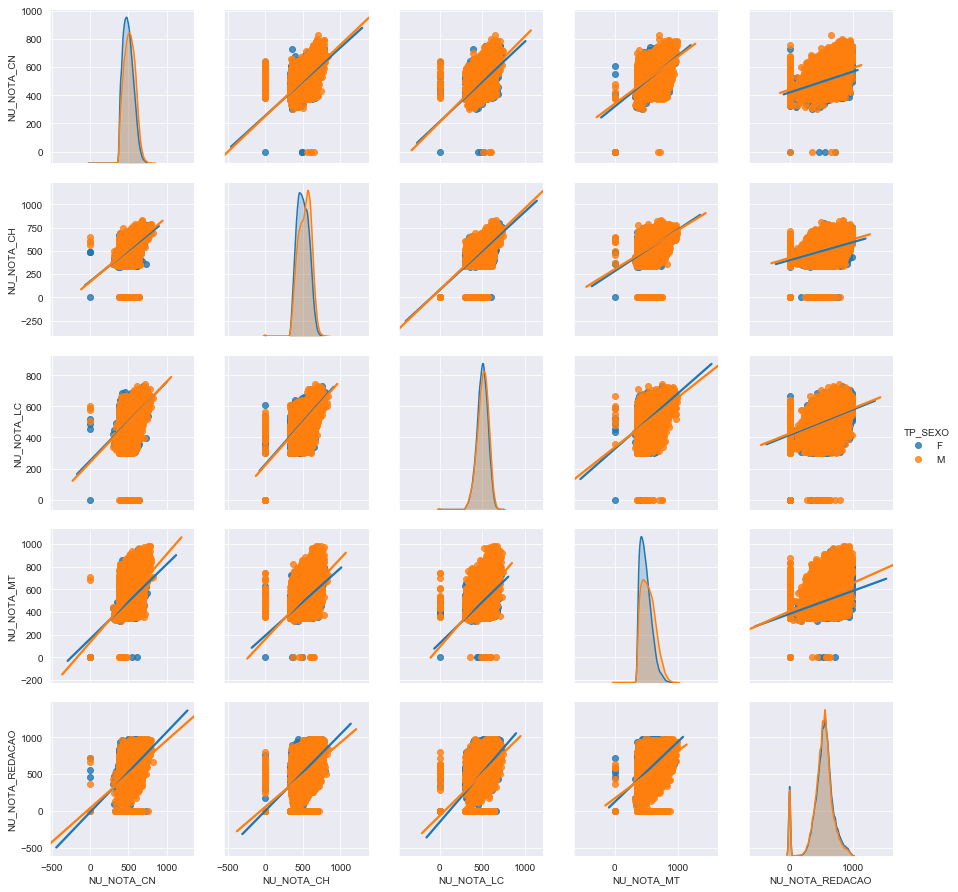

In [13]:
#Plotando as notas no modelo a x b, para identificar algum tipo de correlação
#e imprimindo a correlação pearson entre as notas
print(grades_sex.head())
sns.pairplot(grades_sex.dropna(), kind='reg', hue='TP_SEXO')
plt.show()

In [14]:
from scipy.stats import pearsonr

print("Correlação entre CN e CH")
print(pearsonr(x=grades['NU_NOTA_CN'], y=grades['NU_NOTA_CH'])[0], '\n')

print("Correlação entre CN e LC")
print(pearsonr(x=grades['NU_NOTA_CN'], y=grades['NU_NOTA_LC'])[0], '\n')

print("Correlação entre CN e MT")
print(pearsonr(x=grades['NU_NOTA_CN'], y=grades['NU_NOTA_MT'])[0], '\n')

print("Correlação entre CH e LC")
print(pearsonr(x=grades['NU_NOTA_CH'], y=grades['NU_NOTA_LC'])[0], '\n')

print("Correlação entre CH e MT")
print(pearsonr(x=grades['NU_NOTA_CH'], y=grades['NU_NOTA_MT'])[0], '\n')

print("Correlação entre LC e MT")
print(pearsonr(x=grades['NU_NOTA_LC'], y=grades['NU_NOTA_MT'])[0], '\n')

Correlação entre CN e CH
0.5876280972762452 

Correlação entre CN e LC
0.5485376480177699 

Correlação entre CN e MT
0.5119083592989464 

Correlação entre CH e LC
0.6846500640635681 

Correlação entre CH e MT
0.5443289225245882 

Correlação entre LC e MT
0.5165239132452104 



In [15]:
#Analisando as notas baseado no tipo de instituição de ensino que o candidato registrou na inscrição
#1: Federal, 2: Estadual, 3: Municipal, 4. Particular
#
grades_school_type_cols = grade_cols + ['TP_DEPENDENCIA_ADM_ESC']

grades_school_type = educ[grades_school_type_cols].dropna(0)


federal = grades_school_type[grades_school_type['TP_DEPENDENCIA_ADM_ESC'] == 1].drop('TP_DEPENDENCIA_ADM_ESC', axis=1)
estadual = grades_school_type[grades_school_type['TP_DEPENDENCIA_ADM_ESC'] == 2].drop('TP_DEPENDENCIA_ADM_ESC', axis=1)
municipal = grades_school_type[grades_school_type['TP_DEPENDENCIA_ADM_ESC'] == 3].drop('TP_DEPENDENCIA_ADM_ESC', axis=1)
particular = grades_school_type[grades_school_type['TP_DEPENDENCIA_ADM_ESC'] == 4].drop('TP_DEPENDENCIA_ADM_ESC', axis=1)

print('Descrição estatística das escolas federais\n', federal.describe(), '\n')

print('Descrição estatística das escolas estaduais\n', estadual.describe(), '\n')

print('Descrição estatística das escolas municipais\n', municipal.describe(), '\n')

print('Descrição estatística das escolas particulares\n', particular.describe(), '\n')

Descrição estatística das escolas federais
         NU_NOTA_CN   NU_NOTA_CH   NU_NOTA_LC   NU_NOTA_MT  NU_NOTA_REDACAO
count  2546.000000  2546.000000  2546.000000  2546.000000      2546.000000
mean    566.503339   579.125098   557.519167   605.086057       667.533386
std      66.089000    72.334638    55.531541   110.131355       142.816889
min     313.500000     0.000000     0.000000   340.000000         0.000000
25%     522.825000   540.725000   527.225000   525.675000       600.000000
50%     574.950000   591.100000   562.500000   607.500000       660.000000
75%     614.700000   627.200000   594.375000   686.525000       760.000000
max     828.700000   832.500000   729.500000   958.700000       980.000000 

Descrição estatística das escolas estaduais
          NU_NOTA_CN    NU_NOTA_CH    NU_NOTA_LC    NU_NOTA_MT  NU_NOTA_REDACAO
count  15594.000000  15594.000000  15594.000000  15594.000000     15594.000000
mean     481.534552    482.896146    478.358061    479.107445       480.5732

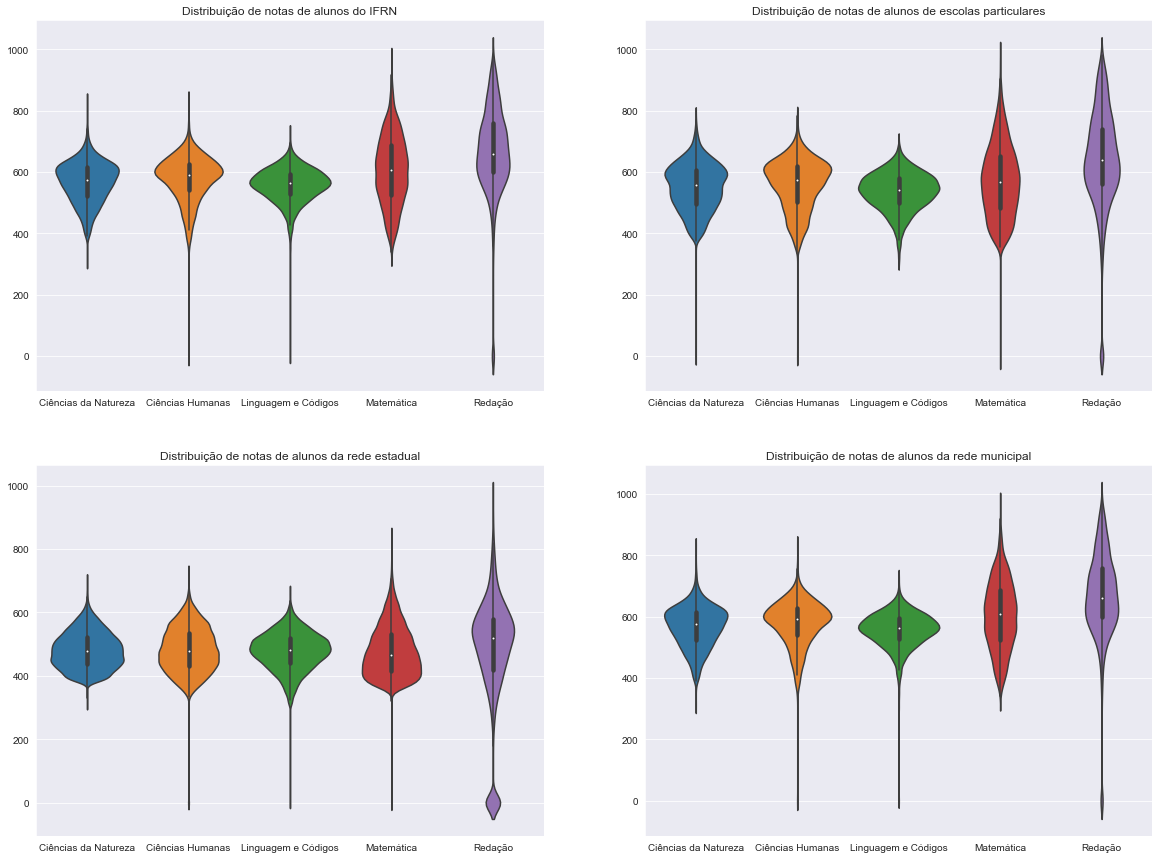

In [16]:
#Plotando gráficos de distribuição de notas
plt.figure(figsize=(20, 15))

plt.subplot(221)
sns.violinplot(data=federal)
plt.xticks(np.arange(5), labels_subjects)
plt.title("Distribuição de notas de alunos do IFRN")

plt.subplot(222)
sns.violinplot(data=particular)
plt.xticks(np.arange(5), labels_subjects)
plt.title("Distribuição de notas de alunos de escolas particulares")

plt.subplot(223)
sns.violinplot(data=estadual)
plt.xticks(np.arange(5), labels_subjects)
plt.title("Distribuição de notas de alunos da rede estadual")

plt.subplot(224)
sns.violinplot(data=federal)
plt.xticks(np.arange(5), labels_subjects)
plt.title("Distribuição de notas de alunos da rede municipal")

plt.show()


# 3. Hypothesis testing of distributions
In this section, we will check if the distribution plotted on violonplot functions are really differente between them, by using hypothesis test with p-values.

In [17]:
from scipy.stats import ttest_ind

alpha = 0.05

def test_between_dists(array1, array2, alpha=0.05):
    '''
    Hypothesis testing that array1 has the same mean distribution as array2.
    Returns True if p-values is greater than alpha, otherwise returns False.
    '''
    stat, p = ttest_ind(array1, array2)
    if p > alpha:
        return True
    else:
        return False

def testing_distributions_on_attribute(df, attribute):
    cat_values = df[attribute].unique()
    #work_df = df.drop('attribute', axis=1)
    for i in cat_values:
        for j in cat_values:
            if i == j: 
                continue
            else:
                df1 = df[df[attribute] == i].drop(attribute, axis=1)
                df2 = df[df[attribute] == j].drop(attribute, axis=1)
                
    
#implementar comparação cor cada nota
def compare_grades_dists(df1, df2):
    cols = df1.columns.values.tolist()
    for col in cols:
        

SyntaxError: unexpected EOF while parsing (<ipython-input-17-94e7b8955a72>, line 32)

In [ ]:
testing_distributions_on_attribute(grades_school_type, 'TP_DEPENDENCIA_ADM_ESC')

# 4. Clustering the data
In this section, we will use clustering techniques to study diferent profiles of Rio Grande do Norte's students. But first, we have to clean the data so we can organize into categories.

In [ ]:
print(educ.info())
from scipy.cluster import hierarchy
categories_cols = [
    'CO_MUNICIPIO_RESIDENCIA', 
    #'CO_UF_RESIDENCIA',
    #'SG_UF_RESIDENCIA',
    'NU_IDADE',
    'TP_SEXO',
    'TP_ESTADO_CIVIL',
    'TP_COR_RACA',
    'TP_NACIONALIDADE',
    'CO_MUNICIPIO_NASCIMENTO',
    'TP_ST_CONCLUSAO',
    'TP_ANO_CONCLUIU',
    'TP_ESCOLA',
    'TP_ENSINO',
    'IN_TREINEIRO',
    'CO_ESCOLA',
    'CO_UF_ESC',
    'TP_DEPENDENCIA_ADM_ESC',
    'TP_LOCALIZACAO_ESC',
    'TP_SIT_FUNC_ESC',
    'IN_BAIXA_VISAO',
    'IN_CEGUEIRA',
    'IN_SURDEZ',
    'IN_DEFICIENCIA_AUDITIVA',
    'IN_SURDO_CEGUEIRA',
    'IN_DEFICIENCIA_FISICA',
    'IN_DEFICIENCIA_MENTAL',
    'IN_DEFICIT_ATENCAO',
    'IN_DISLEXIA',
    'IN_DISCALCULIA',
    'IN_AUTISMO',
    'IN_VISAO_MONOCULAR',
    'IN_OUTRA_DEF',
    'IN_GESTANTE',
    'IN_LACTANTE',
    'IN_IDOSO',
    'IN_ESTUDA_CLASSE_HOSPITALAR',
    'IN_SEM_RECURSO',
    'IN_BRAILLE',
    'IN_AMPLIADA_24',
    'IN_AMPLIADA_18',
    'IN_LEDOR',
    'IN_ACESSO',
    'IN_TRANSCRICAO',
    'IN_LIBRAS',
    'IN_LEITURA_LABIAL',
    'IN_MESA_CADEIRA_RODAS',
    'IN_MESA_CADEIRA_SEPARADA',
    'IN_APOIO_PERNA',
    'IN_GUIA_INTERPRETE',
    'IN_COMPUTADOR',
    'IN_CADEIRA_ESPECIAL',
    'IN_CADEIRA_CANHOTO',
    'IN_CADEIRA_ACOLCHOADA',
    'IN_PROVA_DEITADO',
    'IN_MOBILIARIO_OBESO',
    'IN_LAMINA_OVERLAY',
    'IN_PROTETOR_AURICULAR',
    'IN_MEDIDOR_GLICOSE',
    'IN_MAQUINA_BRAILE',
    'IN_SOROBAN',
    'IN_MARCA_PASSO',
    'IN_SONDA',
    'IN_MEDICAMENTOS',
    'IN_SALA_INDIVIDUAL',
    'IN_SALA_ESPECIAL',
    'IN_SALA_ACOMPANHANTE',
    'IN_MOBILIARIO_ESPECIFICO',
    'IN_MATERIAL_ESPECIFICO',
    'IN_NOME_SOCIAL',
    'CO_MUNICIPIO_PROVA',
    'CO_UF_PROVA',
    'SG_UF_PROVA',
    'TP_PRESENCA_CN',
    'TP_PRESENCA_CH',
    'TP_PRESENCA_LC',
    'TP_PRESENCA_MT',
    'TP_LINGUA',
    'TP_STATUS_REDACAO',
    'Q001',
    'Q002',
    'Q003',
    'Q004',
    'Q005',
    'Q006',
    'Q007',
    'Q008',
    'Q009',
    'Q010',
    'Q011',
    'Q012',
    'Q013',
    'Q014',
    'Q015',
    'Q016',
    'Q017',
    'Q018',
    'Q019',
    'Q020',
    'Q021',
    'Q022',
    'Q023',
    'Q024',
    'Q025',
    'Q026',
    'Q027'
]

df_teste = educ[categories_cols].astype('category')

print(df_teste.info())

In [ ]:
#!pip install fastcluster

In [18]:
df_educ_cluster_map = educ[grade_cols].dropna()
#sns.clustermap(data=df_educ_cluster_map, method='average')
plt.show()

In [ ]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(df_educ_cluster_map, 'average')